# Text Analysis

In [10]:
from sklearn.linear_model import LogisticRegression
import pickle
import scipy
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

POSITIVE SENTIMENTS:  1080
NEGATIVE SENTIMENTS:  1023


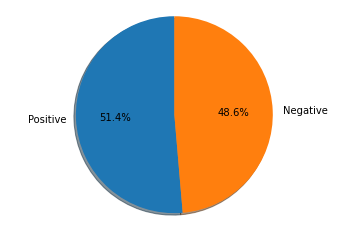

In [2]:
import csv
pos=0
neg=0
with open('OpinionLevelSentiment.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    lineno=0
    for row in csv_reader:
        if(lineno==0):
            lineno=1
            continue
        if(float(row[4])>0):
            pos+=1
        elif(float(row[4])<0):
            neg+=1
        
print("POSITIVE SENTIMENTS: ",pos)
print("NEGATIVE SENTIMENTS: ",neg)

sentlabels=['Positive','Negative']
sz=[pos,neg]

fig1, ax1 = plt.subplots()
ax1.pie(sz, labels=sentlabels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [30]:
import pandas as pd
df = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [32]:
df = df.replace('\n','', regex=True)
df.head()

,Transcript,Sentiment
0,BUT I CAN SAFELY ASSURE YOU THAT EVEN IF THEY...,POSITIVE
1,AND I LOVED IT,POSITIVE
2,I DONT KNOW IF FANS OF THE COMIC WOULD BE AS I...,NEGATIVE
3,BUT JUST GOING INTO THIS A AS AN OBSERVER AND ...,POSITIVE
4,AND I WOULD TELL YOU RIGHT NOW IT WAS HILARIOUS,POSITIVE


In [33]:
X_train,y_train = df[['Transcript']],df[['Sentiment']]
X_test,y_test = df_test[['Transcript']],df_test['Sentiment']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 4000) 

# create bag of words vector for the training set using countVectorizer
train_data_features = vectorizer.fit_transform(X_train['Transcript'].values)

# tf-idf transformer initialization
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# create tfidf transformed vector  for the training set using tf-idf transformer
X_train_tfidf = tfidf_transformer.fit_transform(train_data_features)

In [34]:
test_data_features = vectorizer.transform(X_test['Transcript'].values)
X_test_tfidf = tfidf_transformer.transform(test_data_features)

# SVM

In [35]:
from sklearn import svm
model_tf = svm.SVC(kernel='linear').fit(X_train_tfidf,y_train['Sentiment'].values)

# generate predictions
predicted_tf = model_tf.predict(X_test_tfidf)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_tf))

              precision    recall  f1-score   support

    NEGATIVE       0.76      0.70      0.73       336
    POSITIVE       0.67      0.73      0.70       275

    accuracy                           0.72       611
   macro avg       0.72      0.72      0.72       611
weighted avg       0.72      0.72      0.72       611



In [36]:
cm=confusion_matrix(y_test, predicted_tf)
print(cm)

[[236 100]
 [ 73 202]]


Text(60.0, 0.5, 'Truth value')

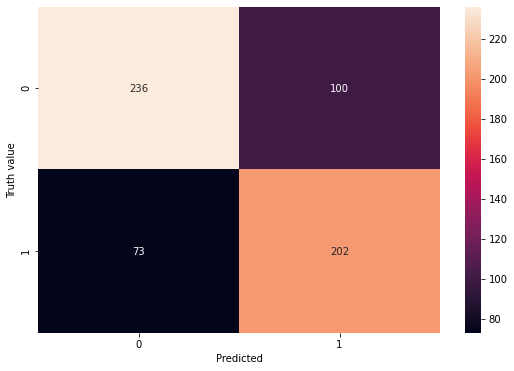

In [37]:
import seaborn as sn

plt.figure(figsize=(9,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth value')

In [14]:
x = "I am not looking forward to the concert"

In [15]:
vec = vectorizer.transform([x])

In [16]:

vec

<1x2437 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [17]:
model_tf.predict(vec)

array(['NEGATIVE'], dtype=object)

# LR

In [19]:
df = pd.read_csv('train_and_test.csv')
df = df.replace('\n','', regex=True)
df.head()

,Transcript,Sentiment
0,BUT I CAN SAFELY ASSURE YOU THAT EVEN IF THEY...,POSITIVE
1,AND I LOVED IT,POSITIVE
2,I DONT KNOW IF FANS OF THE COMIC WOULD BE AS I...,NEGATIVE
3,BUT JUST GOING INTO THIS A AS AN OBSERVER AND ...,POSITIVE
4,AND I WOULD TELL YOU RIGHT NOW IT WAS HILARIOUS,POSITIVE


In [20]:
vectorizer = TfidfVectorizer(sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['Transcript']).toarray()

In [27]:
X = df['Transcript']
Y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=500)),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)
with open('LogisticRegression_Text_sentiment.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
cm=confusion_matrix(ytest, model.predict(X_test))
print(cm)

              precision    recall  f1-score   support

    NEGATIVE       0.74      0.72      0.73       251
    POSITIVE       0.75      0.77      0.76       275

    accuracy                           0.75       526
   macro avg       0.74      0.74      0.74       526
weighted avg       0.75      0.75      0.75       526

[[181  70]
 [ 64 211]]


Text(60.0, 0.5, 'Truth value')

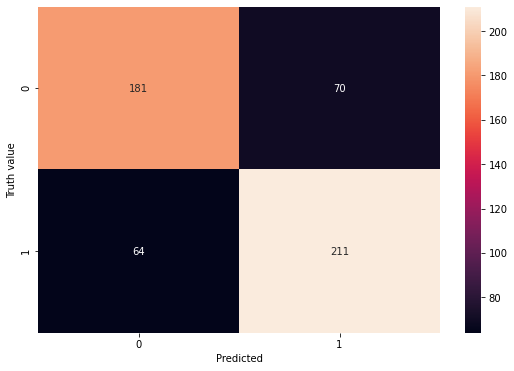

In [29]:
import seaborn as sn

plt.figure(figsize=(9,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth value')

In [22]:
x = "It was a great watch"

In [23]:
#Loading model to compare the results
model = pickle.load(open('LogisticRegression_Text_sentiment.pickle','rb'))
print(model.predict([x]))

['POSITIVE']


In [24]:
model.predict_proba([x]) 

# [NEGATIVE , POSITIVE]

array([[0.15780932, 0.84219068]])

## Split Audio Files to Test and Train

In [ ]:
import shutil
import csv
#prepare Positive,Negative folders for test data
with open('OpinionLevelSentiment.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    videocount=0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            name=row[2]
            segment=row[3]
            if segment == '1':
                videocount+=1

            if videocount < 63:
                if(float(row[4])>0):
                    shutil.copy('/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/'+name+'_'+segment+'.wav','/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE')
                elif(float(row[4])<0):
                    shutil.copy('/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/'+name+'_'+segment+'.wav','/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE')
            else:
                if(float(row[4])>0):
                    shutil.copy('/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/'+name+'_'+segment+'.wav','/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TEST/POSITIVE')
                elif(float(row[4])<0):
                    shutil.copy('/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/'+name+'_'+segment+'.wav','/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TEST/NEGATIVE')

# Audio Ananlysis

The function used for this purpose is feature_extraction_train(listOfDirs, mtWin, mtStep, stWin, stStep, classifierType, modelName, computeBEAT) from audioTrainTest.py. The first argument is list of paths of directories. Each directory contains a signle audio class whose samples are stored in seperate WAV files. Then, the function takes the mid-term window size and step and the short-term window size and step respectively. The arguments classifierType and modelName are associated to the classifier type and name. The latest is also used as a name of the file where the model is stored for future use (see next sections on classification and segmentation). Finally, the last argument is a boolean, set to True if the long-term beat-related features are to be calculated (e.g. for music genre classification tasks). In addition, an ARFF file is also created (with the same name as the model), where the whole set of feature vectors and respective class labels are stored.

In [1]:
from pyAudioAnalysis import audioTrainTest as aT
aT.extract_features_and_train(['/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE','/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE'], 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svmSentimentAnalysis", False)

Analyzing file 1 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/03bSnISJMiM_10.wav
Analyzing file 2 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/03bSnISJMiM_11.wav
Analyzing file 3 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/03bSnISJMiM_2.wav
Analyzing file 4 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/03bSnISJMiM_3.wav
Analyzing file 5 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/03bSnISJMiM_4.wav
Analyzing file 6 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/0h-zjBukYpk_1.wav
Analyzing file 7 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/0h-zjBukYpk_10.wav
Analyzing file 8 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/0h-zjBukYpk_12.wav
Analyzing file 9 of 687: /home/nishk

Analyzing file 69 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/73jzhE8R1TQ_11.wav
Analyzing file 70 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/73jzhE8R1TQ_12.wav
Analyzing file 71 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/73jzhE8R1TQ_13.wav
Analyzing file 72 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/73jzhE8R1TQ_15.wav
Analyzing file 73 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/73jzhE8R1TQ_16.wav
Analyzing file 74 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/73jzhE8R1TQ_17.wav
Analyzing file 75 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/73jzhE8R1TQ_18.wav
Analyzing file 76 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/73jzhE8R1TQ_19.wav
Analyzing file 77 of 687

Analyzing file 137 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/8qrpnFRGt2A_23.wav
Analyzing file 138 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/8qrpnFRGt2A_26.wav
Analyzing file 139 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/8qrpnFRGt2A_3.wav
Analyzing file 140 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/8qrpnFRGt2A_4.wav
Analyzing file 141 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/8qrpnFRGt2A_5.wav
Analyzing file 142 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/8qrpnFRGt2A_6.wav
Analyzing file 143 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/8qrpnFRGt2A_7.wav
Analyzing file 144 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/8qrpnFRGt2A_8.wav
Analyzing file 145 of 

Analyzing file 204 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/BXuRRbG0Ugk_15.wav
Analyzing file 205 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/BXuRRbG0Ugk_17.wav
Analyzing file 206 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/BXuRRbG0Ugk_18.wav
Analyzing file 207 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/BXuRRbG0Ugk_20.wav
Analyzing file 208 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/BXuRRbG0Ugk_27.wav
Analyzing file 209 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/BXuRRbG0Ugk_3.wav
Analyzing file 210 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/BXuRRbG0Ugk_30.wav
Analyzing file 211 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/BXuRRbG0Ugk_31.wav
Analyzing file 21

Analyzing file 271 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/Clx4VXItLTE_30.wav
Analyzing file 272 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/Clx4VXItLTE_4.wav
Analyzing file 273 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/Clx4VXItLTE_5.wav
Analyzing file 274 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/Clx4VXItLTE_6.wav
Analyzing file 275 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/Clx4VXItLTE_9.wav
Analyzing file 276 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/Dg_0XKD0Mf4_1.wav
Analyzing file 277 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/Dg_0XKD0Mf4_10.wav
Analyzing file 278 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/Dg_0XKD0Mf4_13.wav
Analyzing file 279 of

Analyzing file 339 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/LSi-o-IrDMs_26.wav
Analyzing file 340 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/LSi-o-IrDMs_27.wav
Analyzing file 341 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/LSi-o-IrDMs_28.wav
Analyzing file 342 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/LSi-o-IrDMs_4.wav
Analyzing file 343 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/LSi-o-IrDMs_6.wav
Analyzing file 344 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/LSi-o-IrDMs_7.wav
Analyzing file 345 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/LSi-o-IrDMs_9.wav
Analyzing file 346 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/MLal-t_vJPM_1.wav
Analyzing file 347 of

Analyzing file 407 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/aiEXnCPZubE_8.wav
Analyzing file 408 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/aiEXnCPZubE_9.wav
Analyzing file 409 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/atnd_PF-Lbs_1.wav
Analyzing file 410 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/atnd_PF-Lbs_10.wav
Analyzing file 411 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/atnd_PF-Lbs_12.wav
Analyzing file 412 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/atnd_PF-Lbs_13.wav
Analyzing file 413 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/atnd_PF-Lbs_14.wav
Analyzing file 414 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/atnd_PF-Lbs_18.wav
Analyzing file 415 

Analyzing file 475 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/c7UH_rxdZv4_27.wav
Analyzing file 476 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/c7UH_rxdZv4_28.wav
Analyzing file 477 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/c7UH_rxdZv4_3.wav
Analyzing file 478 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/c7UH_rxdZv4_31.wav
Analyzing file 479 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/c7UH_rxdZv4_32.wav
Analyzing file 480 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/c7UH_rxdZv4_33.wav
Analyzing file 481 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/c7UH_rxdZv4_5.wav
Analyzing file 482 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/c7UH_rxdZv4_6.wav
Analyzing file 483 

Analyzing file 542 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/d6hH302o4v8_37.wav
Analyzing file 543 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/d6hH302o4v8_38.wav
Analyzing file 544 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/d6hH302o4v8_39.wav
Analyzing file 545 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/d6hH302o4v8_4.wav
Analyzing file 546 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/d6hH302o4v8_40.wav
Analyzing file 547 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/d6hH302o4v8_41.wav
Analyzing file 548 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/d6hH302o4v8_42.wav
Analyzing file 549 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/d6hH302o4v8_43.wav
Analyzing file 55

Analyzing file 611 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/iiK8YX8oH1E_13.wav
Analyzing file 612 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/iiK8YX8oH1E_14.wav
Analyzing file 613 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/iiK8YX8oH1E_18.wav
Analyzing file 614 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/iiK8YX8oH1E_3.wav
Analyzing file 615 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/iiK8YX8oH1E_4.wav
Analyzing file 616 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/iiK8YX8oH1E_5.wav
Analyzing file 617 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/iiK8YX8oH1E_7.wav
Analyzing file 618 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/iiK8YX8oH1E_8.wav
Analyzing file 619 of

Analyzing file 679 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/nzpVDcQ0ywM_15.wav
Analyzing file 680 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/nzpVDcQ0ywM_19.wav
Analyzing file 681 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/nzpVDcQ0ywM_2.wav
Analyzing file 682 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/nzpVDcQ0ywM_21.wav
Analyzing file 683 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/nzpVDcQ0ywM_4.wav
Analyzing file 684 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/nzpVDcQ0ywM_5.wav
Analyzing file 685 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/nzpVDcQ0ywM_6.wav
Analyzing file 686 of 687: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/NEGATIVE/nzpVDcQ0ywM_7.wav
Analyzing file 687 of

Analyzing file 63 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/2WGyTLYerpo_36.wav
Analyzing file 64 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/2WGyTLYerpo_37.wav
Analyzing file 65 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/2WGyTLYerpo_38.wav
Analyzing file 66 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/2WGyTLYerpo_40.wav
Analyzing file 67 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/2WGyTLYerpo_41.wav
Analyzing file 68 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/2WGyTLYerpo_43.wav
Analyzing file 69 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/2WGyTLYerpo_44.wav
Analyzing file 70 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/2WGyTLYerpo_45.wav
Analyzing file 71 of 805

Analyzing file 132 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/6Egk_28TtTM_8.wav
Analyzing file 133 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/6_0THN4chvY_1.wav
Analyzing file 134 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/6_0THN4chvY_10.wav
Analyzing file 135 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/6_0THN4chvY_11.wav
Analyzing file 136 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/6_0THN4chvY_12.wav
Analyzing file 137 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/6_0THN4chvY_13.wav
Analyzing file 138 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/6_0THN4chvY_14.wav
Analyzing file 139 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/6_0THN4chvY_2.wav
Analyzing file 140 

Analyzing file 200 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/8qrpnFRGt2A_25.wav
Analyzing file 201 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/9J25DZhivz8_1.wav
Analyzing file 202 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/9J25DZhivz8_10.wav
Analyzing file 203 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/9J25DZhivz8_11.wav
Analyzing file 204 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/9J25DZhivz8_12.wav
Analyzing file 205 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/9J25DZhivz8_14.wav
Analyzing file 206 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/9J25DZhivz8_15.wav
Analyzing file 207 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/9J25DZhivz8_16.wav
Analyzing file 20

Analyzing file 267 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Af8D0E4ZXaw_2.wav
Analyzing file 268 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Af8D0E4ZXaw_20.wav
Analyzing file 269 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Af8D0E4ZXaw_3.wav
Analyzing file 270 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BI97DNYfe5I_1.wav
Analyzing file 271 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BI97DNYfe5I_10.wav
Analyzing file 272 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BI97DNYfe5I_11.wav
Analyzing file 273 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BI97DNYfe5I_12.wav
Analyzing file 274 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BI97DNYfe5I_13.wav
Analyzing file 275 

Analyzing file 335 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BioHAh1qJAQ_8.wav
Analyzing file 336 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BioHAh1qJAQ_9.wav
Analyzing file 337 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BvYR0L6f2Ig_1.wav
Analyzing file 338 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BvYR0L6f2Ig_11.wav
Analyzing file 339 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BvYR0L6f2Ig_12.wav
Analyzing file 340 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BvYR0L6f2Ig_16.wav
Analyzing file 341 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BvYR0L6f2Ig_17.wav
Analyzing file 342 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/BvYR0L6f2Ig_19.wav
Analyzing file 343 

Analyzing file 403 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Dg_0XKD0Mf4_3.wav
Analyzing file 404 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Dg_0XKD0Mf4_4.wav
Analyzing file 405 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Dg_0XKD0Mf4_5.wav
Analyzing file 406 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Dg_0XKD0Mf4_8.wav
Analyzing file 407 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/G-xst2euQUc_1.wav
Analyzing file 408 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/G-xst2euQUc_10.wav
Analyzing file 409 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/G-xst2euQUc_12.wav
Analyzing file 410 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/G-xst2euQUc_13.wav
Analyzing file 411 of

Analyzing file 471 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/I5y0__X72p0_1.wav
Analyzing file 472 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/I5y0__X72p0_10.wav
Analyzing file 473 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/I5y0__X72p0_11.wav
Analyzing file 474 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/I5y0__X72p0_13.wav
Analyzing file 475 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/I5y0__X72p0_15.wav
Analyzing file 476 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/I5y0__X72p0_18.wav
Analyzing file 477 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/I5y0__X72p0_19.wav
Analyzing file 478 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/I5y0__X72p0_25.wav
Analyzing file 47

Analyzing file 539 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Jkswaaud0hk_4.wav
Analyzing file 540 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Jkswaaud0hk_5.wav
Analyzing file 541 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Jkswaaud0hk_6.wav
Analyzing file 542 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Jkswaaud0hk_7.wav
Analyzing file 543 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Jkswaaud0hk_8.wav
Analyzing file 544 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/Jkswaaud0hk_9.wav
Analyzing file 545 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/LSi-o-IrDMs_1.wav
Analyzing file 546 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/LSi-o-IrDMs_11.wav
Analyzing file 547 of 8

Analyzing file 608 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/aiEXnCPZubE_25.wav
Analyzing file 609 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/aiEXnCPZubE_26.wav
Analyzing file 610 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/aiEXnCPZubE_27.wav
Analyzing file 611 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/aiEXnCPZubE_28.wav
Analyzing file 612 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/aiEXnCPZubE_29.wav
Analyzing file 613 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/aiEXnCPZubE_30.wav
Analyzing file 614 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/aiEXnCPZubE_6.wav
Analyzing file 615 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/aiEXnCPZubE_7.wav
Analyzing file 616

Analyzing file 675 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/cW1FSBF59ik_2.wav
Analyzing file 676 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/cW1FSBF59ik_20.wav
Analyzing file 677 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/cW1FSBF59ik_21.wav
Analyzing file 678 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/cW1FSBF59ik_23.wav
Analyzing file 679 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/cW1FSBF59ik_4.wav
Analyzing file 680 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/cW1FSBF59ik_5.wav
Analyzing file 681 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/cW1FSBF59ik_6.wav
Analyzing file 682 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/cW1FSBF59ik_7.wav
Analyzing file 683 of

Analyzing file 742 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/f_pcplsH_V0_13.wav
Analyzing file 743 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/f_pcplsH_V0_2.wav
Analyzing file 744 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/f_pcplsH_V0_3.wav
Analyzing file 745 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/f_pcplsH_V0_4.wav
Analyzing file 746 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/f_pcplsH_V0_5.wav
Analyzing file 747 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/f_pcplsH_V0_6.wav
Analyzing file 748 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/f_pcplsH_V0_8.wav
Analyzing file 749 of 805: /home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TRAIN/POSITIVE/fvVhgmXxadc_13.wav
Analyzing file 750 of 

Param = 0.00100 - classifier Evaluation Experiment 5 of 10
Param = 0.00100 - classifier Evaluation Experiment 6 of 10
Param = 0.00100 - classifier Evaluation Experiment 7 of 10
Param = 0.00100 - classifier Evaluation Experiment 8 of 10
Param = 0.00100 - classifier Evaluation Experiment 9 of 10
Param = 0.00100 - classifier Evaluation Experiment 10 of 10
Param = 0.01000 - classifier Evaluation Experiment 1 of 10
Param = 0.01000 - classifier Evaluation Experiment 2 of 10
Param = 0.01000 - classifier Evaluation Experiment 3 of 10
Param = 0.01000 - classifier Evaluation Experiment 4 of 10
Param = 0.01000 - classifier Evaluation Experiment 5 of 10
Param = 0.01000 - classifier Evaluation Experiment 6 of 10
Param = 0.01000 - classifier Evaluation Experiment 7 of 10
Param = 0.01000 - classifier Evaluation Experiment 8 of 10
Param = 0.01000 - classifier Evaluation Experiment 9 of 10
Param = 0.01000 - classifier Evaluation Experiment 10 of 10
Param = 0.50000 - classifier Evaluation Experiment 1 o

In [2]:
import IPython
IPython.display.Audio("happy.wav")

In [7]:
res=aT.file_classification("happy.wav","svmSentimentAnalysis","svm")
print(res)
if(res[1][0]>res[1][1]):
    print("\nSentiment is Negative!")
else:
    print("\nSentiment is Positive!")

(1.0, array([0.21948137, 0.78051863]), ['NEGATIVE', 'POSITIVE'])

Sentiment is Positive!


In [12]:
import plotly
import plotly.subplots
cm, thr_prre, pre, rec, thr_roc, fpr, tpr = aT.evaluate_model_for_folders(["/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TEST/NEGATIVE","/home/nishka/Documents/CMU_MOSI/Raw/Audio/WAV_16000/Segmented/TEST/POSITIVE"], "svmSentimentAnalysis", "svm","NEGATIVE")

[[132 204]
 [ 97 178]]
[0.39285714285714285, 0.6472727272727272] [0.5764192139737991, 0.46596858638743455] [0.4672566371681416, 0.5418569254185692] 0.5073649754500819 0.5073649754500819


Text(60.0, 0.5, 'Truth value')

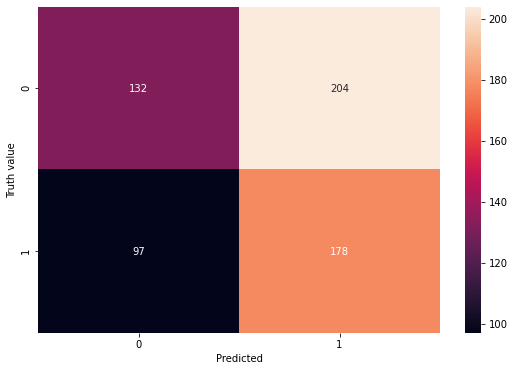

In [13]:
import seaborn as sn

plt.figure(figsize=(9,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth value')

In [2]:
#Accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy :',(132+178)/(132+204+97+178))

Accuracy : 0.5073649754500819


## A-T fusion (Feature level fusion)

In [21]:
import numpy as np

audio_f=[]
labels=[]
j=0
with open('audio_train_features.arff') as f:
    for i in range(140):
        next(f)
    for line in f:
        line=line[:-10]
        v=list(map(float, line.split(",")))
        audio_f.append(v)
        j+=1

In [22]:
audio_f=np.array(audio_f)

In [23]:
audio_f.shape

(1492, 136)

In [12]:
import scipy
text_f=X_train_tfidf.toarray()

In [13]:
TRAIN_FUSED_features=np.hstack((text_f,audio_f))

In [14]:
TRAIN_FUSED_features.shape

(1492, 2573)

In [15]:
#test features

In [14]:
text_test_f=X_test_tfidf.toarray()

In [17]:
import numpy as np

audio_test_f=[]
test_labels=[]
j=0
with open('audio_test_features.arff') as f:
    for i in range(140):
        next(f)
    for line in f:
        line=line[:-10]
        v=list(map(float, line.split(",")))
        audio_test_f.append(v)
        j+=1

In [18]:
audio_test_f=np.array(audio_test_f)
audio_test_f.shape

(611, 136)

In [19]:
text_test_f.shape

(611, 2437)

In [20]:
TEST_FUSED_features=np.hstack((text_test_f,audio_test_f))

In [21]:
TEST_FUSED_features.shape

(611, 2573)

In [22]:
#normalization
from sklearn.preprocessing import MinMaxScaler

norm=MinMaxScaler().fit(TRAIN_FUSED_features)

X_train_norm=norm.transform(TRAIN_FUSED_features)
X_test_norm=norm.transform(TEST_FUSED_features)

In [24]:
y_train=np.array(y_train)
y_train=y_train.reshape(1492)

In [24]:
from sklearn import svm
from sklearn.decomposition import PCA

#.99 means that we want to include 99% of the variance
pca=PCA(.99)
X_train_pca=pca.fit_transform(X_train_norm)
X_test_pca=pca.transform(X_test_norm)
model=svm.SVC(kernel='linear').fit(X_train_pca,y_train)

In [25]:
predict=model.predict(X_test_pca)

In [26]:
y_test=np.array(y_test)
y_test.shape

(611,)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

    NEGATIVE       0.74      0.66      0.70       336
    POSITIVE       0.63      0.71      0.67       275

    accuracy                           0.68       611
   macro avg       0.68      0.69      0.68       611
weighted avg       0.69      0.68      0.68       611



## Video analysis-Create test train split

In [2]:
import shutil
import csv
#prepare Positive,Negative folders for test data
with open('OpinionLevelSentiment.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    videocount=0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            name=row[2]
            segment=row[3]
            if segment == '1':
                videocount+=1

            if videocount < 63:
                if(float(row[4])>0):
                    shutil.copy('/home/nishka/Documents/CMU_MOSI/Raw/Video/Segmented/'+name+'_'+segment+'.mp4','/home/nishka/Documents/CMU_MOSI/Raw/Video/Segmented/TRAIN/POSITIVE')
                elif(float(row[4])<0):
                    shutil.copy('/home/nishka/Documents/CMU_MOSI/Raw/Video/Segmented/'+name+'_'+segment+'.mp4','/home/nishka/Documents/CMU_MOSI/Raw/Video/Segmented/TRAIN/NEGATIVE')
            else:
                if(float(row[4])>0):
                    shutil.copy('/home/nishka/Documents/CMU_MOSI/Raw/Video/Segmented/'+name+'_'+segment+'.mp4','/home/nishka/Documents/CMU_MOSI/Raw/Video/Segmented/TEST/POSITIVE')
                elif(float(row[4])<0):
                    shutil.copy('/home/nishka/Documents/CMU_MOSI/Raw/Video/Segmented/'+name+'_'+segment+'.mp4','/home/nishka/Documents/CMU_MOSI/Raw/Video/Segmented/TEST/NEGATIVE')